## Evaluacion de Modelos de Regression Lineal con restricciones Ridge y Lasso 

Autor : Gerson Roberto Salazar Boslanga

In [1]:
from pprint import pprint
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [2]:
diamonds=pd.read_csv('C:/Users/gero_/Documents/python works/fuentes/diamonds.csv')

In [3]:
(training_data,testing_data)=train_test_split(diamonds,train_size=0.7,random_state=421)

## Primer modelo de Regresion sin usar algun tipo restriccion 

Usaremos todas las caracteristicas numericas

In [4]:
features=diamonds.drop(['s','cut','color','clarity','price'], axis=1).columns

In [5]:
model1=LinearRegression()
model1.fit(training_data[features],training_data['price'])

LinearRegression()

In [6]:
predictions1=model1.predict(testing_data[features])

In [7]:
for i,j in zip(testing_data['price'],predictions1):
    print(i,j)

596 768.2963260929027
1744 1444.3497023233576
15826 14261.702647691218
18392 14975.110715557155
1114 409.39916915179856
1052 1537.455525609068
1169 1257.030781600719
597 215.40102929681234
2789 2055.295213286925
4987 6405.230196314507
3300 5183.5375204893935
2318 2544.0790012956713
3844 5867.7799192135935
4973 5552.230314422035
16656 16117.305926638179
2905 2883.151154985262
772 1097.818850573327
3485 4047.0769099688514
775 550.0921420747327
1424 950.4909371997419
2005 1772.3430301564222
2604 1932.5704291181573
1784 1537.5421326632677
1875 1464.3034000297666
1088 965.067008383583
2339 5770.4374613205055
1987 1492.3699248516568
561 641.9898200921671
544 221.51017661055448
2199 1603.8441867816073
1123 1235.800104772563
11322 13244.584670777856
1013 459.6866706326291
442 608.767638592486
4138 4364.339011499971
625 702.3786909940427
6403 7312.22564326774
4406 5108.156356379819
7785 7558.876555879715
3921 4277.682231103527
625 406.11335606699504
1718 2292.931210144845
16013 13997.9111325857

In [8]:
residuos1=testing_data['price']-predictions1

Analisis de residuos para ver si genera Homocedasticidad

Text(0, 0.5, 'Residuos')

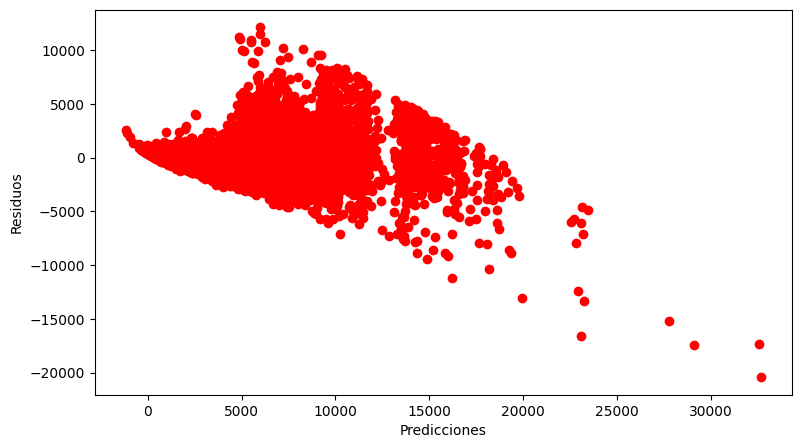

In [9]:
fig,graph=plt.subplots(figsize=(9,5))
graph.scatter(np.array(predictions1),np.array(residuos1),color='red',marker='o')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')

Evaluando con metricas

In [10]:
r2_score(y_true=np.array(testing_data['price']), y_pred=np.array(predictions1))

0.8563680165330891

In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testing_data['price'],predictions1)

np.float64(2294648.974176298)

## Usaremos Modelos con restricciones Ridge y Lasso

Primero normalizaremos las características

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(training_data[features])
training_data_scaled=scaler.transform(training_data[features])
testing_data_scaled=scaler.transform(testing_data[features])

## Enfoque Lasso

In [29]:
L1=np.linspace(0,5,num=7)

In [34]:
errores_lasso=dict()
for i in L1:
    model_lasso = Lasso(alpha=i)
    try:
        model_lasso.fit(training_data_scaled,training_data['price'])
    except:
        print(i)
        break
    predictions_lasso=model_lasso.predict(testing_data_scaled)
    errores_lasso[i]=mean_squared_error(testing_data['price'],predictions_lasso)
try:
    minimo=min(errores_lasso.values())
    for j,k in errores_lasso.items():
        if k ==minimo:
            print('lambda=',j,' || error=',k)

    pprint(errores_lasso)
except:
    pprint('probar con nuevos valores para lambda')
del errores_lasso

C:\Users\gero_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\gero_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\gero_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider i

lambda= 3.3333333333333335  || error= 2273754.4805821395
{np.float64(0.0): np.float64(2294648.9740088754),
 np.float64(0.8333333333333334): np.float64(2285724.390095713),
 np.float64(1.6666666666666667): np.float64(2279162.6027542865),
 np.float64(2.5): np.float64(2275172.4152019066),
 np.float64(3.3333333333333335): np.float64(2273754.4805821395),
 np.float64(4.166666666666667): np.float64(2274409.210369326),
 np.float64(5.0): np.float64(2275455.712447708)}


In [36]:
del model_lasso
model_lasso= Lasso(alpha=3.3333333333333335)
model_lasso.fit(training_data_scaled,training_data['price'])
for i,j in zip(features,model_lasso.coef_):
    print(i,j)

carat 4888.417909647334
depth -272.4076724415603
table -217.90964432926646
x -1227.966894419747
y 29.665144464709222
z -0.0


Notamos que la característica 'z' no explica bien nuestra variable objetivo 'price'(puesto que su peso es 0), por tanto podemos prescindir del modelo esta característica

Con estas característas aplicaremos el enfoque Ridge para evitar el overfitting

## Enfoque Ridge

In [38]:
featuresL1=features.drop('z')

In [39]:
featuresL1

Index(['carat', 'depth', 'table', 'x', 'y'], dtype='object')

In [56]:
scaler2 = StandardScaler()
scaler2.fit(training_data[featuresL1])
training_data_scaledL1=scaler2.transform(training_data[featuresL1])
testing_data_scaledL1=scaler2.transform(testing_data[featuresL1])

In [46]:
L2=np.linspace(50,200,num=7)

In [57]:
errores_ridge=dict()
for i in L2:
    model_ridge = Ridge(alpha=i)
    try:
        model_ridge.fit(training_data_scaledL1,training_data['price'])
    except:
        print(i)
        break
    predictions_ridge=model_ridge.predict(testing_data_scaledL1)
    errores_ridge[i]=mean_squared_error(testing_data['price'],predictions_ridge)
try:
    minimo=min(errores_ridge.values())
    for j,k in errores_ridge.items():
        if k ==minimo:
            print('lambda=',j,' || error=',k)

    pprint(errores_ridge)
except:
    pprint('probar con nuevos valores para lambda')
del errores_ridge

lambda= 75.0  || error= 2284381.411547502
{np.float64(50.0): np.float64(2285437.840079849),
 np.float64(75.0): np.float64(2284381.411547502),
 np.float64(100.0): np.float64(2284779.9044163926),
 np.float64(125.0): np.float64(2286213.7361293077),
 np.float64(150.0): np.float64(2288398.60572162),
 np.float64(175.0): np.float64(2291138.01110358),
 np.float64(200.0): np.float64(2294293.5878810682)}


In [58]:
model_ridge = Ridge(alpha=75.0)
model_ridge.fit(training_data_scaledL1,training_data['price'])
predictions_ridge=model_ridge.predict(testing_data_scaledL1)

Evaluamos el modelo usando metrica R2

In [59]:
r2_score(y_true=np.array(testing_data['price']), y_pred=np.array(predictions_ridge))

0.8570107075949209

In [60]:
residuos_ridge=testing_data['price']-predictions_ridge

Text(0, 0.5, 'Residuos')

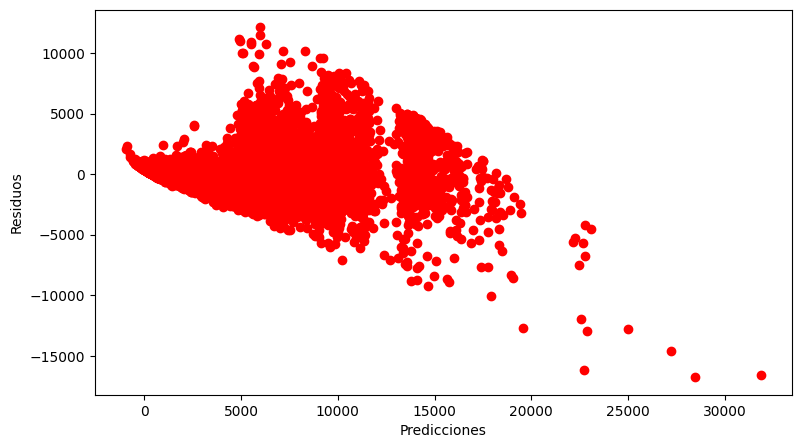

In [61]:
fig,graph=plt.subplots(figsize=(9,5))
graph.scatter(np.array(predictions_ridge),np.array(residuos_ridge),color='red',marker='o')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')

Comparando con los pesos respecto al primer modelo

In [53]:
#pesos para el modelo 1
for i,j in zip(features,model1.coef_):
    print(i,j)

carat 10628.892873291461
depth -200.8524814148143
table -98.61220786182943
x -1579.4715788251144
y 354.1050323358944
z 49.18296521799027


In [62]:
#pesos para el modelo ridge 
for i,j in zip(features,model_ridge.coef_):
    print(i,j)

carat 4776.8833806018265
depth -269.2841815558242
table -219.44956412998056
x -1322.7655085318668
y 234.6502343038336


R2 modelo 1: 0.8564

R2 modelo con restriccion : 0.8570

## Conclusiones:
A traves de la comparación de ambos modelos notamos que usar restricciones  Ridge y Lasso aumenta NO tan significativamente el desempeño del modelo .
Lasso nos indico que podiamos prescindir de una caracteristica y  con el enfoque Ridge evitamos el overfitting disminuyendo la magnitud de coeficientes de algunas caracteristicas como simbolo de ello , siendo la caracteristica 'carat' la que mas influye en el precio ;haciendo que el desempeño del modelo no varie sino que aumente aunque no mucho.

De la gráfica de residuos podemmos concluir que muestra heterocedasticidad lo que indica que una regresion lineal no es el mejor modelo que se debe aplicar sugiriendo hacer transformaciones a las características o probar con otro modelo en su defecto. Aunque la metrica del coeficiente R2 es bastante decente , puede que no esté capturando bien el comportarmiento de los datos

Queda como tema de investigacion aplicar ADABOOST o SVM para evaluar el desempeño de estos nuevos modelos.